In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

from sklearn.impute import KNNImputer # fills missing values in Numerical columns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

from sklearn.model_selection import train_test_split

plt.rcParams["figure.figsize"] = (10,10)

In [4]:
data = pd.read_csv("car_price_prediction.csv")
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
data.drop(['ID'], axis = 1, inplace = True)
# data = data.drop(['ID'], axis = 1)

In [6]:
data['Price'].min(), data['Price'].mean(), data['Price'].median(), data['Price'].max()

(1, 18555.92722357956, 13172.0, 26307500)

**Data Analysis**

In [7]:
# Levy - int (object)
# Engine volume - float (object)
# Mileage - int (object)
# Door - int (object)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  object 
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [8]:
# [10,15,16,17,20,21,25]
# mean = (10+15+16+17+20+21+25)/7
# median (50th quartile) = 17
# quantile/quartile = %th value

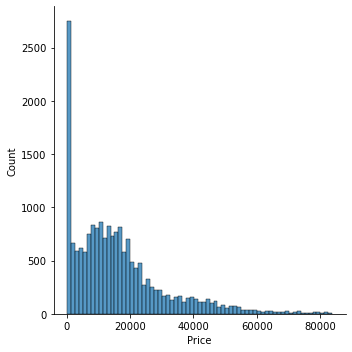

In [19]:
threshold = data['Price'].quantile(0.99) # get 99th quantile of Price
tmpData = data[data['Price'] < threshold] # I'm slicing data where price < threshold
sns.displot(data = tmpData, x = 'Price')
# sns.displot(data = data, x = 'Price')

<AxesSubplot:xlabel='Manufacturer', ylabel='count'>

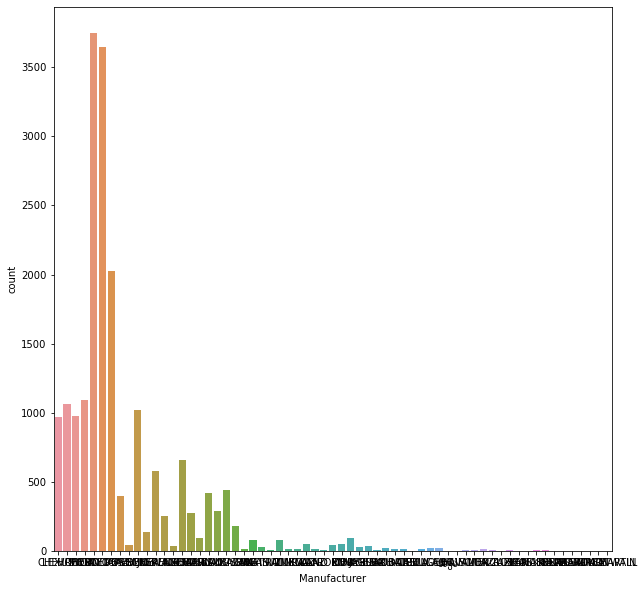

In [23]:
sns.countplot(data = tmpData, x = 'Manufacturer')

In [53]:
tmpData['Manufacturer'].value_counts()

HYUNDAI          3748
TOYOTA           3645
MERCEDES-BENZ    2027
FORD             1089
CHEVROLET        1066
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: Manufacturer, Length: 63, dtype: int64

In [54]:
tmpData['Model'].value_counts()

Prius              1083
Sonata             1079
Camry               936
Elantra             922
E 350               542
                   ... 
Move                  1
325 CI                1
C 230 kompresor       1
Tiida 2008            1
Prius C aqua          1
Name: Model, Length: 1548, dtype: int64

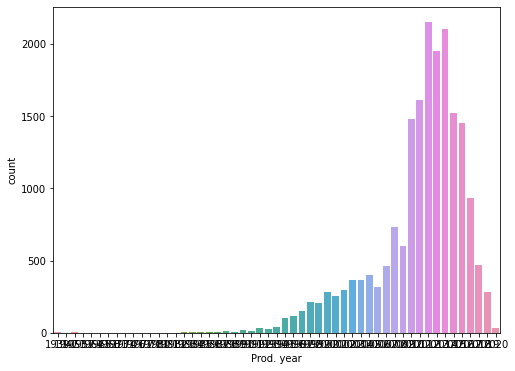

In [55]:
sns.countplot(data = tmpData, x = 'Prod. year')

In [56]:
print(" Oldest Car : ", tmpData['Prod. year'].min(), " Newest Car : ", tmpData['Prod. year'].max())
tmpData['Prod. year'].value_counts()

 Oldest Car :  1939  Newest Car :  2020


2012    2149
2014    2104
2013    1950
2011    1609
2015    1522
2010    1482
2016    1449
2017     934
2008     735
2009     600
2018     470
2007     464
2005     401
2003     366
2004     364
2006     317
2002     296
2019     283
2000     279
2001     254
1998     213
1999     206
1997     151
1996     114
1995     105
1994      42
2020      33
1992      30
1993      23
1990      18
1988      12
1991      10
1986       6
1989       6
1985       5
1984       5
1987       5
1953       4
1939       3
1983       3
1978       2
1980       2
1965       2
1974       2
1964       2
1977       2
1976       1
1957       1
1968       1
1947       1
1982       1
1981       1
1973       1
Name: Prod. year, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

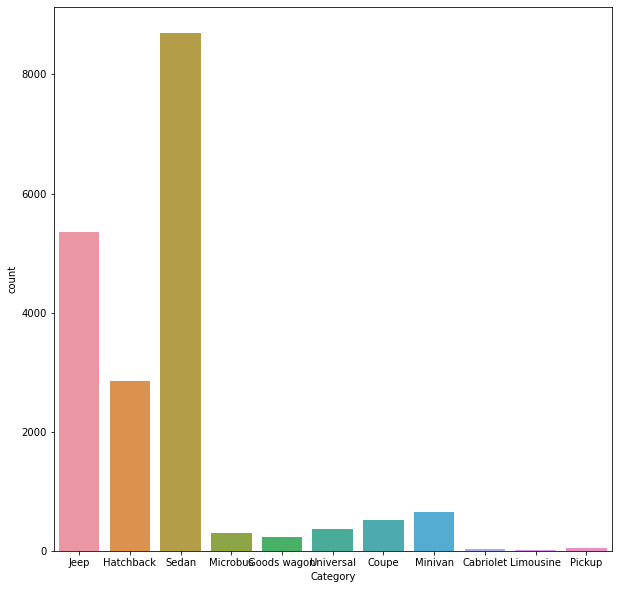

In [29]:

#tmpData['Category'].value_counts()
sns.countplot(data = tmpData, x = 'Category')

In [30]:
tmpData['Category'].value_counts()

Sedan          8694
Jeep           5349
Hatchback      2847
Minivan         644
Coupe           519
Universal       360
Microbus        303
Goods wagon     231
Pickup           48
Cabriolet        35
Limousine        11
Name: Category, dtype: int64

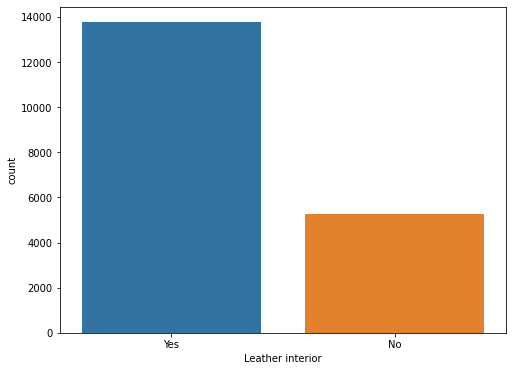

In [59]:
sns.countplot(x = 'Leather interior', data = tmpData)

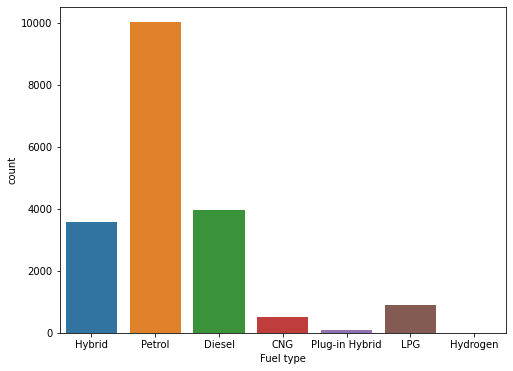

In [60]:
sns.countplot(x = 'Fuel type', data = tmpData)

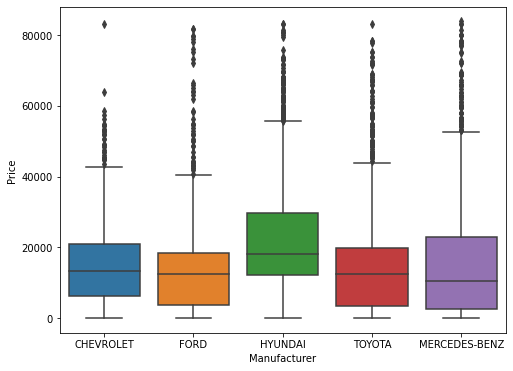

In [61]:
manufacData = tmpData[tmpData['Manufacturer'].isin(['HYUNDAI','TOYOTA','MERCEDES-BENZ','FORD','CHEVROLET'])]
sns.boxplot(x = 'Manufacturer', y = 'Price', data = manufacData)

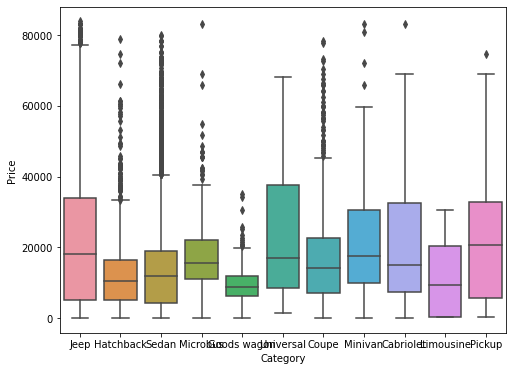

In [62]:
sns.boxplot(x = 'Category', y = 'Price', data = tmpData)

**Data Processing**

In [63]:
# Standardizing Data 
# 1. drop Model - done ! 
# 2. Engine Volume -> 2 cols - done ! 
# 3. Convert Mileage into Int - done ! 
# 4. Make Changes in Doors - done !
# 5. (tmpData['Manufacturer'].value_counts() < 10).sum()

In [31]:
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [65]:
data.drop(['Model'], axis = 1, inplace = True)

In [66]:
# Engine volume has Turbo
data['Engine volume']

0              3.5
1                3
2              1.3
3              2.5
4              1.3
           ...    
19232    2.0 Turbo
19233          2.4
19234            2
19235            2
19236          2.4
Name: Engine volume, Length: 19237, dtype: object

In [67]:
data.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [68]:
data['Engine volume'].values

array(['3.5', '3', '1.3', ..., '2', '2', '2.4'], dtype=object)

In [69]:
def ProcessEngineVolume(engineCol):
    volume = []
    turbo = []
    for val in engineCol.values:
        output = val.split(" ")
        if len(output) > 1:
            volume.append(float(output[0]))
            turbo.append("Turbo")
        else:
            volume.append-*(float(output[0]))
            turbo.append("Normal")
    return volume, turbo

In [70]:
engine_volume, engine_type = ProcessEngineVolume(data['Engine volume'])
data['EngineVolume'] = engine_volume 
data['EngineType'] = engine_type
data.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,EngineVolume,EngineType
0,13328,1399,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,3.5,Normal
1,16621,1018,CHEVROLET,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,3.0,Normal
2,8467,-,HONDA,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,1.3,Normal
3,3607,862,FORD,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,2.5,Normal
4,11726,446,HONDA,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,1.3,Normal


In [71]:
data['EngineType'].value_counts()

Normal    17306
Turbo      1931
Name: EngineType, dtype: int64

In [72]:
data.drop(['Engine volume'], axis = 1, inplace = True)

In [73]:
data.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,EngineVolume,EngineType
0,13328,1399,LEXUS,2010,Jeep,Yes,Hybrid,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,3.5,Normal
1,16621,1018,CHEVROLET,2011,Jeep,No,Petrol,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,3.0,Normal
2,8467,-,HONDA,2006,Hatchback,No,Petrol,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,1.3,Normal
3,3607,862,FORD,2011,Jeep,Yes,Hybrid,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,2.5,Normal
4,11726,446,HONDA,2014,Hatchback,Yes,Petrol,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,1.3,Normal


In [74]:
# def square(x):
#     return x**2

# lambda parameters : return
# square = lambda x : x**2
# square(2)

In [75]:
# series_obj = pd.Series([1,2,3,4]) # "1 km", "2 km"
# series_obj = series_obj.apply(lambda x : str(x) + " km")
# print(series_obj)

In [76]:
def HandleMileage(x):
    if x == '-':
        return np.nan
    else:
        return int(x.split(" ")[0])

data['Mileage'] = data['Mileage'].apply(lambda x : HandleMileage(x))
data.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,EngineVolume,EngineType
0,13328,1399,LEXUS,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,3.5,Normal
1,16621,1018,CHEVROLET,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,3.0,Normal
2,8467,-,HONDA,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,1.3,Normal
3,3607,862,FORD,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,2.5,Normal
4,11726,446,HONDA,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,1.3,Normal


In [77]:
data['Doors']

0        04-May
1        04-May
2        04-May
3        04-May
4        04-May
          ...  
19232    02-Mar
19233    04-May
19234    04-May
19235    04-May
19236    04-May
Name: Doors, Length: 19237, dtype: object

In [83]:
# data['Doors']
def getDoorCount(x):
    x = x.split("-")[0] # 04
    if x.startswith('0') or x.startswith('>') or x.startswith('<'):
        return int(x[1])
    else:
        return int(x)

In [84]:
# data['Doors'] = data['Doors'].apply(lambda x : x.split("-")[0])
# data['Doors'] = data['Doors'].apply(lambda x : x[1] if x.startswith("0") else x)
data['Doors'] = data['Doors'].apply(lambda x : getDoorCount(x))
data.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,EngineVolume,EngineType
0,13328,1399,LEXUS,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,3.5,Normal
1,16621,1018,CHEVROLET,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,3.0,Normal
2,8467,-,HONDA,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,1.3,Normal
3,3607,862,FORD,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,4,Left wheel,White,0,2.5,Normal
4,11726,446,HONDA,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,1.3,Normal


In [87]:
data['Manufacturer'].value_counts().index

Index(['HYUNDAI', 'TOYOTA', 'MERCEDES-BENZ', 'FORD', 'CHEVROLET', 'BMW',
       'LEXUS', 'HONDA', 'NISSAN', 'VOLKSWAGEN', 'SSANGYONG', 'KIA', 'OPEL',
       'MITSUBISHI', 'SUBARU', 'AUDI', 'MAZDA', 'JEEP', 'DAEWOO', 'DODGE',
       'FIAT', 'SUZUKI', 'PORSCHE', 'LAND ROVER', 'VAZ', 'MINI', 'JAGUAR',
       'RENAULT', 'INFINITI', 'CHRYSLER', 'SKODA', 'VOLVO', 'PEUGEOT', 'BUICK',
       'LINCOLN', 'ACURA', 'GMC', 'CADILLAC', 'DAIHATSU', 'GAZ', 'UAZ',
       'CITROEN', 'SCION', 'HUMMER', 'MASERATI', 'MERCURY', 'ISUZU',
       'ALFA ROMEO', 'MOSKVICH', 'ROVER', 'FERRARI', 'SAAB', 'ROLLS-ROYCE',
       'სხვა', 'SEAT', 'ZAZ', 'BENTLEY', 'LANCIA', 'HAVAL', 'LAMBORGHINI',
       'TESLA', 'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'],
      dtype='object')

In [88]:
# who are manufacturers with count < 10
manufacturers = data['Manufacturer'].value_counts().index
less_occuring_manufacturers = manufacturers[data['Manufacturer'].value_counts() < 10]

data['Manufacturer'].replace(less_occuring_manufacturers, "Others", inplace = True)
data.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,EngineVolume,EngineType
0,13328,1399,LEXUS,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,3.5,Normal
1,16621,1018,CHEVROLET,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,3.0,Normal
2,8467,-,HONDA,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,1.3,Normal
3,3607,862,FORD,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,4,Left wheel,White,0,2.5,Normal
4,11726,446,HONDA,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,1.3,Normal


In [89]:
data['Manufacturer'].value_counts()

HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
BMW              1049
LEXUS             982
HONDA             977
NISSAN            660
VOLKSWAGEN        579
SSANGYONG         441
KIA               421
OPEL              397
MITSUBISHI        289
SUBARU            275
AUDI              255
MAZDA             183
JEEP              138
DAEWOO             91
DODGE              91
FIAT               78
SUZUKI             76
Others             66
PORSCHE            54
LAND ROVER         49
VAZ                48
MINI               48
JAGUAR             42
RENAULT            37
INFINITI           30
CHRYSLER           26
SKODA              20
VOLVO              19
PEUGEOT            17
BUICK              16
GMC                15
LINCOLN            15
ACURA              15
CADILLAC           14
DAIHATSU           13
GAZ                12
UAZ                12
Name: Manufacturer, dtype: int64

In [92]:
data['Levy']

0        1399
1        1018
2           -
3         862
4         446
         ... 
19232       -
19233     831
19234     836
19235    1288
19236     753
Name: Levy, Length: 19237, dtype: object

In [93]:
data.replace("-", np.nan, inplace = True)
data.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,EngineVolume,EngineType
0,13328,1399,LEXUS,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,3.5,Normal
1,16621,1018,CHEVROLET,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,3.0,Normal
2,8467,NaN,HONDA,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,1.3,Normal
3,3607,862,FORD,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,4,Left wheel,White,0,2.5,Normal
4,11726,446,HONDA,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,1.3,Normal


In [98]:
data['Levy'] = data['Levy'].astype(np.float64)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              13418 non-null  float64
 2   Manufacturer      19237 non-null  object 
 3   Prod. year        19237 non-null  int64  
 4   Category          19237 non-null  object 
 5   Leather interior  19237 non-null  object 
 6   Fuel type         19237 non-null  object 
 7   Mileage           19237 non-null  int64  
 8   Cylinders         19237 non-null  float64
 9   Gear box type     19237 non-null  object 
 10  Drive wheels      19237 non-null  object 
 11  Doors             19237 non-null  int64  
 12  Wheel             19237 non-null  object 
 13  Color             19237 non-null  object 
 14  Airbags           19237 non-null  int64  
 15  EngineVolume      19237 non-null  float64
 16  EngineType        19237 non-null  object

In [109]:
data.isnull().sum()/data.shape[0]

Price               0.00000
Levy                0.30249
Manufacturer        0.00000
Prod. year          0.00000
Category            0.00000
Leather interior    0.00000
Fuel type           0.00000
Mileage             0.00000
Cylinders           0.00000
Gear box type       0.00000
Drive wheels        0.00000
Doors               0.00000
Wheel               0.00000
Color               0.00000
Airbags             0.00000
EngineVolume        0.00000
EngineType          0.00000
dtype: float64

In [110]:
data.drop(['Levy'], axis = 1, inplace = True)
data.head()

,Price,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,EngineVolume,EngineType
0,13328,LEXUS,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,3.5,Normal
1,16621,CHEVROLET,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,3.0,Normal
2,8467,HONDA,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,1.3,Normal
3,3607,FORD,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,4,Left wheel,White,0,2.5,Normal
4,11726,HONDA,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,1.3,Normal


In [111]:
data.isnull().sum()

Price               0
Manufacturer        0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
EngineVolume        0
EngineType          0
dtype: int64

In [114]:
'''
Age     Diabetes        BP         BMI
25         0            0           25
29         0            0           24
30         0            0           22
70         1            1           40
88         1            1           41
90         1            1           38
28         0            0           23
'''

28.0

In [115]:
Imputer = KNNImputer()

NUMERICAL_COLS = ['Price', 'Mileage','Cylinders','Airbags','EngineVolume']

Imputer.fit(data.loc[:, NUMERICAL_COLS])
data.loc[:, NUMERICAL_COLS] = Imputer.transform(data.loc[:, NUMERICAL_COLS])

In [116]:
data.isnull().sum()

Price               0
Manufacturer        0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
EngineVolume        0
EngineType          0
dtype: int64

In [117]:
data.head()

,Price,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,EngineVolume,EngineType
0,13328.0,LEXUS,2010,Jeep,Yes,Hybrid,186005.0,6.0,Automatic,4x4,4,Left wheel,Silver,12.0,3.5,Normal
1,16621.0,CHEVROLET,2011,Jeep,No,Petrol,192000.0,6.0,Tiptronic,4x4,4,Left wheel,Black,8.0,3.0,Normal
2,8467.0,HONDA,2006,Hatchback,No,Petrol,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2.0,1.3,Normal
3,3607.0,FORD,2011,Jeep,Yes,Hybrid,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0.0,2.5,Normal
4,11726.0,HONDA,2014,Hatchback,Yes,Petrol,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4.0,1.3,Normal


In [136]:
data.isnull()

,Price,Manufacturer,Prod. year,Category,Leather interior,Mileage,Cylinders,Wheel,Color,Airbags,...,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Drive wheels_4x4,Drive wheels_Front,Doors_2,Doors_4
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19233,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19234,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# or -> any 1 is true, then output is true 

vect1 = np.array([1,2,3,4]) > 3
vect2 = np.array([1,2,3,4]) < 2

print(vect1)
print(vect2)

outliers = np.logical_or(vect1, vect2)
print(outliers)
np.where(outliers)[0]

[False False False  True]
[ True False False False]
[ True False False  True]


array([0, 3])

In [118]:
OUTLIERS_DETECT = ['Price', 'Mileage']

def DetectOutlier_ZScore(data, col_name, numerical_cols):
    col_values = data.loc[:, col_name] # series object
    upper_limit = col_values.mean() + 3*col_values.std()
    lower_limit = col_values.mean() - 3*col_values.std()

    print(" Upper Limit :", upper_limit, " Lower Limit :", lower_limit)

    outliers = np.logical_or(col_values.values > upper_limit, col_values.values < lower_limit) # vector of booleans 
    idxs = np.where(outliers)[0]

    print(" Outliers Detected : ", len(idxs))

    plt.plot([upper_limit]*data.shape[0])
    plt.plot([lower_limit]*data.shape[0])
    plt.scatter(x = [i for i in range(data.shape[0])] , y = col_values)
    plt.xlabel("Data Points ")
    plt.ylabel(col_name)
    plt.title(f" Outliers in {col_name} ")
    plt.show()

    print(" Fixing Outliers ")
    data.loc[idxs, col_name] = np.nan # converting outliers to nulls 
    imputer = KNNImputer()
    data.loc[:, numerical_cols] = imputer.fit_transform(data.loc[:, numerical_cols])

    plt.plot([upper_limit]*data.shape[0])
    plt.plot([lower_limit]*data.shape[0])
    plt.scatter(x = [i for i in range(data.shape[0])] , y = data.loc[:, col_name].values)
    plt.xlabel("Data Points ")
    plt.ylabel(col_name)
    plt.title(f" Outliers in {col_name} ")
    plt.show()

    return data

 Upper Limit : 590299.736275607  Lower Limit : -553187.8818284478
 Outliers Detected :  3


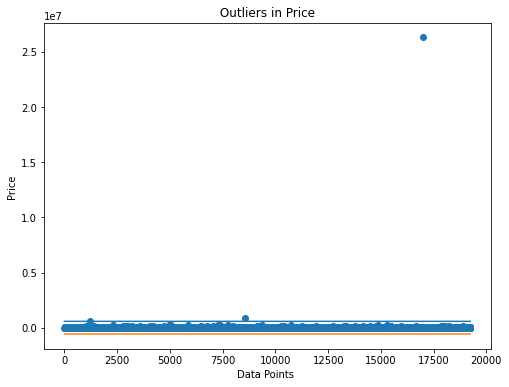

 Fixing Outliers 


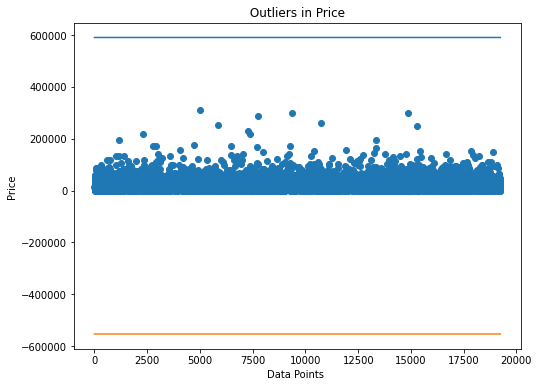

 Upper Limit : 146743843.82555607  Lower Limit : -143679372.4501857
 Outliers Detected :  18


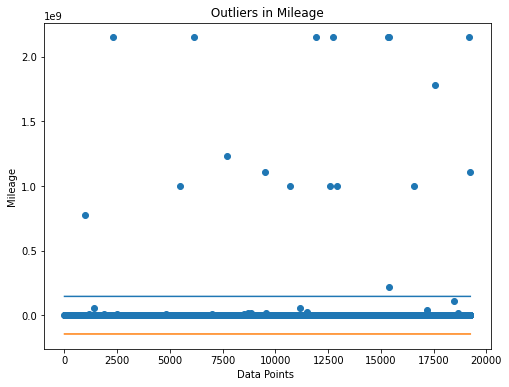

 Fixing Outliers 


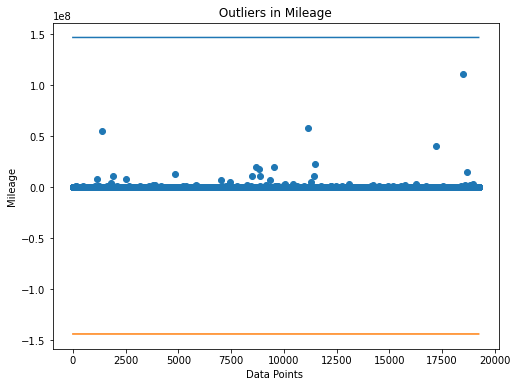

In [119]:
for outlier_col in OUTLIERS_DETECT:
    data = DetectOutlier_ZScore(data, outlier_col, NUMERICAL_COLS)

In [120]:
data.head()

,Price,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,EngineVolume,EngineType
0,13328.0,LEXUS,2010,Jeep,Yes,Hybrid,186005.0,6.0,Automatic,4x4,4,Left wheel,Silver,12.0,3.5,Normal
1,16621.0,CHEVROLET,2011,Jeep,No,Petrol,192000.0,6.0,Tiptronic,4x4,4,Left wheel,Black,8.0,3.0,Normal
2,8467.0,HONDA,2006,Hatchback,No,Petrol,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2.0,1.3,Normal
3,3607.0,FORD,2011,Jeep,Yes,Hybrid,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0.0,2.5,Normal
4,11726.0,HONDA,2014,Hatchback,Yes,Petrol,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4.0,1.3,Normal


In [121]:
# Le -> 2 categories 
# Ohe -> 2 > and < 7

# Curse of Dimentionality -> rows -> N, Cols -> C. N >> C

def ApplyLabelEncoder(data, col_name):
    Le = LabelEncoder()
    data[col_name] = Le.fit_transform(data[col_name])
    return data

def ApplyOneHotEncoder(data, col_name):
    ohe = OneHotEncoder(sparse=False)
    encodings = ohe.fit_transform(data[[col_name]])
    columns = [col_name + "_" + str(categorie) for categorie in ohe.categories_[0][:-1]]
    encodings = pd.DataFrame(encodings[:, :-1], columns = columns)
    
    data = pd.concat([data, encodings], axis = 1)
    data.drop([col_name], axis = 1, inplace = True)
    return data

def HandleCategoricalData(data, ohe_cols, le_cols):
    for col in le_cols: 
        data = ApplyLabelEncoder(data, col)

    for col in ohe_cols:
        data = ApplyOneHotEncoder(data, col)
    return data

In [122]:
data.head()

,Price,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,EngineVolume,EngineType
0,13328.0,LEXUS,2010,Jeep,Yes,Hybrid,186005.0,6.0,Automatic,4x4,4,Left wheel,Silver,12.0,3.5,Normal
1,16621.0,CHEVROLET,2011,Jeep,No,Petrol,192000.0,6.0,Tiptronic,4x4,4,Left wheel,Black,8.0,3.0,Normal
2,8467.0,HONDA,2006,Hatchback,No,Petrol,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2.0,1.3,Normal
3,3607.0,FORD,2011,Jeep,Yes,Hybrid,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0.0,2.5,Normal
4,11726.0,HONDA,2014,Hatchback,Yes,Petrol,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4.0,1.3,Normal


In [123]:
ohe_cols = ['Fuel type', 'Gear box type', 'Drive wheels', 'Doors']
le_cols = ['Manufacturer', 'Category', 'Leather interior', 'Wheel', 'Color', 'EngineType']

data = HandleCategoricalData(data, ohe_cols, le_cols)

In [124]:
data.head()

,Price,Manufacturer,Prod. year,Category,Leather interior,Mileage,Cylinders,Wheel,Color,Airbags,...,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Drive wheels_4x4,Drive wheels_Front,Doors_2,Doors_4
0,13328.0,21,2010,4,1,186005.0,6.0,0,12,12.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,16621.0,5,2011,4,0,192000.0,6.0,0,1,8.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,8467.0,14,2006,3,0,200000.0,4.0,1,1,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3607.0,11,2011,4,1,168966.0,4.0,0,14,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,11726.0,14,2014,3,1,91901.0,4.0,0,12,4.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price                    19237 non-null  float64
 1   Manufacturer             19237 non-null  int64  
 2   Prod. year               19237 non-null  int64  
 3   Category                 19237 non-null  int64  
 4   Leather interior         19237 non-null  int64  
 5   Mileage                  19237 non-null  float64
 6   Cylinders                19237 non-null  float64
 7   Wheel                    19237 non-null  int64  
 8   Color                    19237 non-null  int64  
 9   Airbags                  19237 non-null  float64
 10  EngineVolume             19237 non-null  float64
 11  EngineType               19237 non-null  int64  
 12  Fuel type_CNG            19237 non-null  float64
 13  Fuel type_Diesel         19237 non-null  float64
 14  Fuel type_Hybrid      

In [126]:
X = data.iloc[:, 1:].values
Y = data.iloc[:, 0].values

In [128]:
# X1 (0-1), X2 (0-100)
# Prediction = X1.W1 + X2.W2 

# X1 (0-1), X2 (0-1) 
# 

# Prediction = W.X + b

# MinMax Scaler - brings values between 0 and 1 
#   ScaledValue = (Value - Min)/(Max - Min)
# Standard Sclaer - brings mean -> 0 and std -> 1
#   ScaledValue = (Value - Mean)/Std

Scaler = MinMaxScaler()
X_scale = Scaler.fit_transform(X)
Y_scale = (Y - np.min(Y))/(np.max(Y) - np.min(Y))

# Y_scale*((np.max(Y) - np.min(Y)) + np.min(Y)

In [129]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_scale, Y_scale, test_size = 0.2, shuffle = True, random_state = 4)

In [130]:
def MeanSquaredError(Actual, Prediction):
    return np.mean(np.square(Actual - Prediction))

def RootMeanSquaredError(Actual, Prediction):
    return np.sqrt(MeanSquaredError(Actual, Prediction))

def MeanAbsoluteError(Actual, Prediction):
    return np.mean(np.abs(Actual - Prediction))

def R2Score(Actual, Prediction):
    # How am I performing compared to mean
    SSR = np.sum(np.square(Actual - Prediction))
    SSM = np.sum(np.square(Actual - np.mean(Actual)))
    return 1 - (SSR/SSM)

# if model = mean, R2Score = 0
# if model is better than mean, R2Score > 0. R2Score > 0.7, > 0.9
# if model is worse than mean, R2Score < 0

def PrintMetrics(Actual, Prediction):
    print(" MeanSquaredError : ", MeanSquaredError(Actual, Prediction))
    print(" RootMeanSquaredError : ", RootMeanSquaredError(Actual, Prediction))
    print(" MeanAbsolutedError : ", MeanAbsoluteError(Actual, Prediction))
    print(" R2 Score : ", R2Score(Actual, Prediction))

In [131]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [132]:
model = LinearRegression()
model.fit(Xtrain, Ytrain)
predictions = model.predict(Xtest)
PrintMetrics(Ytest, predictions)

 MeanSquaredError :  0.002574261237065953
 RootMeanSquaredError :  0.0507371780558
 MeanAbsolutedError :  0.033254741023881845
 R2 Score :  0.2523168914071745


In [133]:
model = RandomForestRegressor()
model.fit(Xtrain, Ytrain)
predictions = model.predict(Xtest)
PrintMetrics(Ytest, predictions)

 MeanSquaredError :  0.0011241771349086568
 RootMeanSquaredError :  0.03352875087009143
 MeanAbsolutedError :  0.01494622661494116
 R2 Score :  0.6734875844242274


In [135]:
predictions = model.predict(Xtest)
actual_answers = Ytest*(np.max(Y) - np.min(Y)) + np.min(Y)
actual_predictions = predictions*(np.max(Y) - np.min(Y)) + np.min(Y)
print(" Actual Value : ", actual_answers[0], " Predicted Value : ", actual_predictions[0])

 Actual Value :  18189.0  Predicted Value :  16616.389999999992


In [ ]:
# Try Grid 